In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

X,y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5,0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)

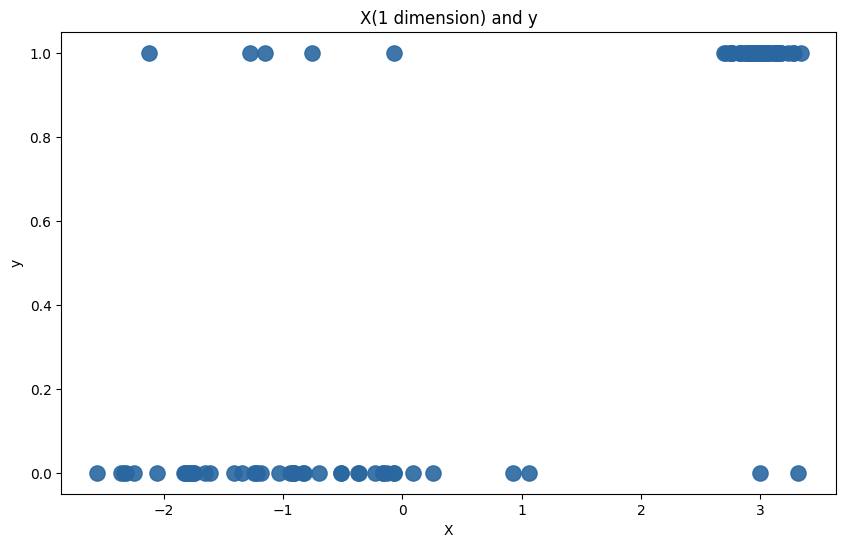

In [88]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y, c='#2A67A0', alpha=0.9, s=120)
ax.set_title('X(1 dimension) and y')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.show()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X, y)

coefficient = model.coef_
intercept = model.intercept_

print("Question 2")
print("Intercept:", intercept)
print("Coefficient:", coefficient)

Question 2
Intercept: [-0.98385574]
Coefficient: [[1.18866075]]


Question 3


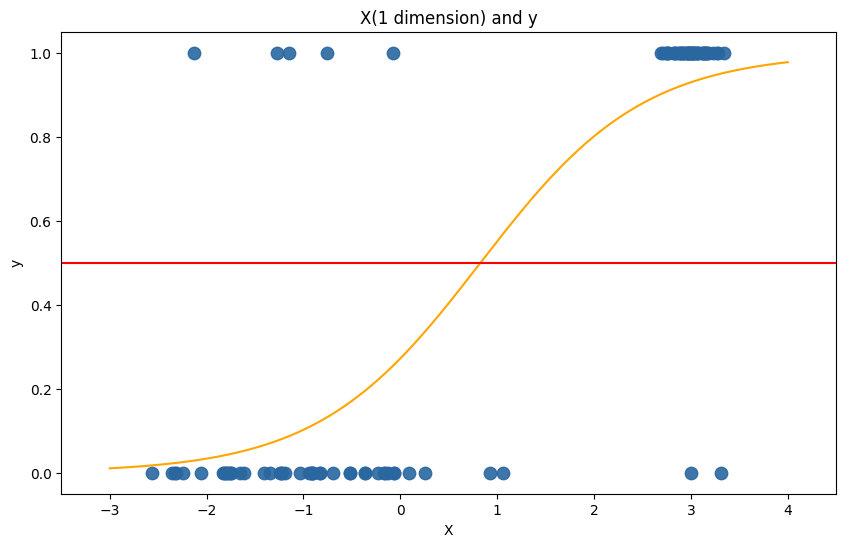

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y, c='#2A67A0', alpha=0.9, s=80)
ax.set_title('X(1 dimension) and y')
ax.set_xlabel('X')
ax.set_ylabel('y')

# Generate x_values for plotting the sigmoid curve
x_values = np.linspace(-3, 4, 400).reshape(-1, 1)

# Calculate the fitted sigmoid values
y_values = 1 / (1 + np.exp(-(model.intercept_ + model.coef_[0]*x_values)))

# Fitted sigmoid curve (Golden)
ax.plot(x_values, y_values, label='Fitted Sigmoid', c='orange')

# 0.5 probability line (Red)
ax.axhline(y=0.5, color='red', linestyle='-', label='0.5 Probability')

# Set x-axis limits and tickers
ax.set_xlim(-3.5, 4.5)
ax.set_xticks(np.arange(-3, 5, 1))  # Ticks from -3 to 4 at intervals of 1

print("Question 3")
#ax.legend()  # Add a legend
plt.show()

In [91]:
def predict_probability(coefs, X):
    '''
    coefs is a list that contains coef and intercept: [coef, intercept]
    X is the features set

    Returns probability of X
    '''
    coef, intercept = coefs
    probabilities = 1 / (1 + np.exp(-(coef * X + intercept)))
    
    return probabilities.flatten()

In [92]:
# Regenerate the original data for demonstration
# np.random.seed(42)  # for reproducibility
# X = np.random.rand(50, 1) * 10  # Random dataset for X between 0 and 10
# y = (X[:, 0] > 5).astype(int)  # y is 1 if X > 5 else 0

# Re-fit the Logistic Regression model on the previously generated data
model = LogisticRegression()
model.fit(X, y)

# Coefficients and intercept from the fitted Logistic Regression model
coefs = [model.coef_[0][0], model.intercept_[0]]

In [93]:
# Using scikit-learn's predict_proba method
sklearn_probabilities = model.predict_proba(X)[:, 1]  # Taking the second column for class=1

In [94]:
print("Question 4")
# Using the modified custom function
custom_probabilities = predict_probability(coefs, X)

# Compare the two sets of probabilities
print("\nCustom probabilities and sklearn probabilities are the same: ",np.allclose(custom_probabilities, sklearn_probabilities) )

print("\nCustom probabilities\n")
print(custom_probabilities)
print("\nSklearn probabilities\n")
print(sklearn_probabilities)

Question 4

Custom probabilities and sklearn probabilities are the same:  True

Custom probabilities

[0.16855576 0.93810815 0.08051049 0.92083715 0.93520812 0.92546684
 0.07576046 0.11206416 0.93419423 0.94221002 0.04069668 0.02217977
 0.0520942  0.25531821 0.12300093 0.93030777 0.02521797 0.92710964
 0.03134186 0.02901377 0.90879909 0.29300139 0.09844986 0.92923953
 0.91787911 0.90727816 0.92420997 0.94002495 0.92033514 0.08342251
 0.56917544 0.93340569 0.04408432 0.11289147 0.04122182 0.95031481
 0.07965447 0.25671796 0.94861041 0.11079507 0.90153688 0.04266255
 0.04463706 0.24284228 0.1955845  0.01745011 0.93540745 0.91519073
 0.04980959 0.93094049 0.23623781 0.93932531 0.9215783  0.22221559
 0.13185808 0.19425263 0.92732264 0.93234878 0.33533806 0.93931791
 0.93042341 0.91441871 0.06548752 0.02291485 0.9079704  0.93037939
 0.91606239 0.94810616 0.92262234 0.0786998  0.14026148 0.92641923
 0.92293145 0.11235863 0.92796108 0.94568015 0.07002604 0.04278977
 0.10895243 0.12186317 0.93

In [95]:
def predict_class(coefs, X, threshold=0.5):
    '''
    coefs is a list that contains coef and intercept: [coef, intercept]
    X is the features set
    threshold is the decision boundary for classification

    Returns predicted class of X
    '''
    probabilities = predict_probability(coefs, X)
    predicted_class = (probabilities >= threshold).astype(int)
    
    return predicted_class

In [96]:
# Using the custom function
custom_predictions = predict_class(coefs, X)  # X_test is your test dataset

print("Question 5")
# Using scikit-learn's predict method
sklearn_predictions = model.predict(X)  # log_reg is your fitted Logistic Regression model
# Compare the two sets of probabilities
print("\nCustom probabilities and sklearn probabilities are the same: ",np.allclose(custom_predictions, sklearn_predictions) )

# Check if the predictions are the same
print("\nCustom predictions: \n", custom_predictions)
print("\nScikit-learn predictions: \n", sklearn_predictions)

Question 5

Custom probabilities and sklearn probabilities are the same:  True

Custom predictions: 
 [0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1]

Scikit-learn predictions: 
 [0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1]


Question 6


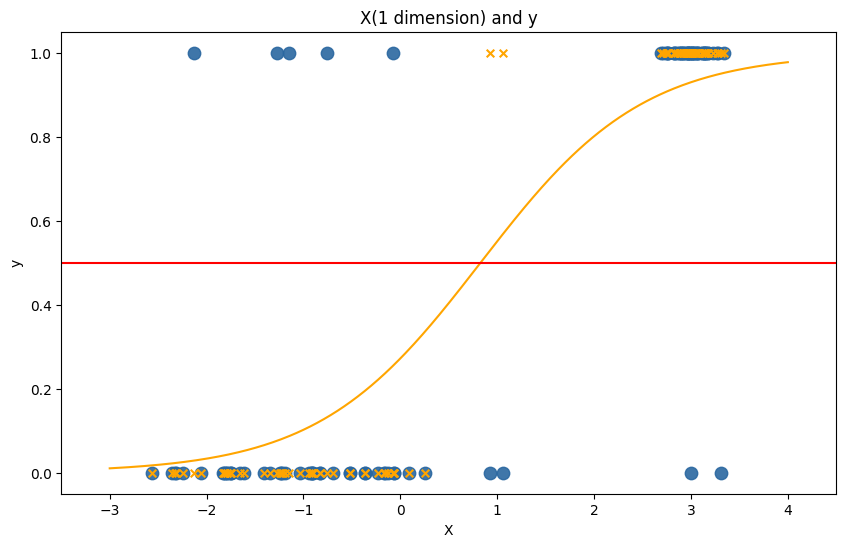

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y, c='#2A67A0', alpha=0.9, s=80)
ax.set_title('X(1 dimension) and y')
ax.set_xlabel('X')
ax.set_ylabel('y')

ax.scatter(X, custom_predictions, c='orange', s=30, marker='x')

# Generate x_values for plotting the sigmoid curve
x_values = np.linspace(-3, 4, 400).reshape(-1, 1)

# Calculate the fitted sigmoid values
y_values = 1 / (1 + np.exp(-(model.intercept_ + model.coef_[0]*x_values)))

# Fitted sigmoid curve (Golden)
ax.plot(x_values, y_values, label='Fitted Sigmoid', c='orange')

# 0.5 probability line (Red)
ax.axhline(y=0.5, color='red', linestyle='-', label='0.5 Probability')

# Set x-axis limits and tickers
ax.set_xlim(-3.5, 4.5)
ax.set_xticks(np.arange(-3, 5, 1))  # Ticks from -3 to 4 at intervals of 1

print("Question 6")
#ax.legend()  # Add a legend
plt.show()

In [98]:
# Generate 2-dimensional data
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_samples=250,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.05,
                           class_sep=3,
                           random_state=43)

# Display the shape of X and y to confirm data generation
X.shape, y.shape

((250, 2), (250,))

Question 7


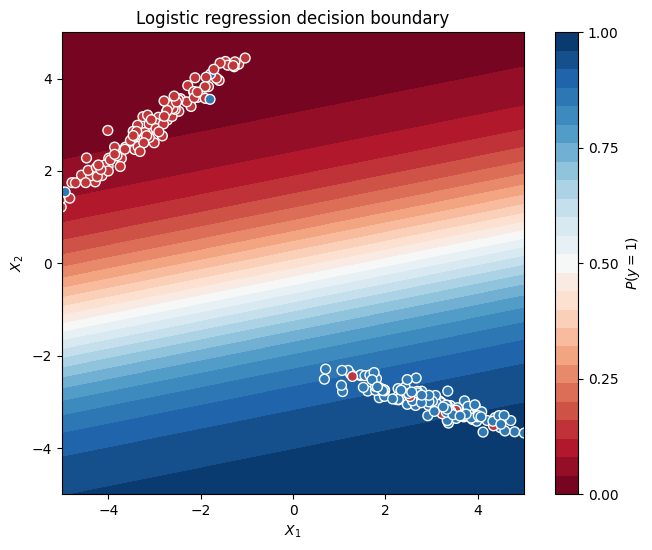

In [99]:
# Create the mesh grid according to the auditor's settings
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

# Fit a Logistic Regression model on the 2D data
log_reg_2d = LogisticRegression()
log_reg_2d.fit(X, y)

# Predict the probabilities using the fitted model (assuming clf is the trained model)
probs = log_reg_2d.predict_proba(grid)[:, 1].reshape(xx.shape)

# Create the plot
f, ax = plt.subplots(figsize=(8, 6))

# Contour plot for decision boundary
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

# Scatter plot of the original data
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)

# Labels and axis settings
ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.title('Logistic regression decision boundary')

print("Question 7")
plt.show()